<font color='blue'><h1>Transition Énergétique : Analyse des textes courts<br></h1> <h2>Date d'extraction : 01/01/2023-23/04/2023</h2></font>

<h2><font color='green'>Import des tweets scrappés - Remplissage sous DataFrame et Nettoyage des données </font></h2>

In [6]:
import pandas as pd

In [82]:
df = pd.read_excel('PPD_Transition_Energetique_Scrapping.xlsx')
df

,Content,Date,Jour,Mois,Année,Link,Utilisateur,Comments,Retweets,Quotes,Hearts
0,Vœux 2023: le Président de l’exécutif de la CT...,2023-01-01,1,1,2023,/sweetyprisci/status/1609699590252421127#m,Prisci,NaN,1.0,NaN,NaN
1,Ceux qui ont décidé des objectifs en terme de ...,2023-01-01,1,1,2023,/PhilippeE31/status/1609675938157002754#m,Philippe 🕊☢️,NaN,NaN,NaN,NaN
2,"Notre transition énergétique, nous l'avons fai...",2023-01-01,1,1,2023,/MarcLeTerrien/status/1609666449542365185#m,Marc Le Terrien,NaN,1.0,1.0,NaN
3,"""La France a réduit la part de l'électricité p...",2023-01-01,1,1,2023,/AVIVIANT/status/1609664485744119811#m,VIV,NaN,NaN,NaN,NaN
4,Tres bonne année et #IESF à bientôt sur l'ant...,2023-01-01,1,1,2023,/RumeauMarc/status/1609657054288814085#m,Marc Rumeau,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2144,"Ils sont incompétents, ils n'ont rien réformé ...",2023-04-22,22,4,2023,/falias503/status/1649809840053579776#m,Fred,NaN,NaN,3.0,NaN
2145,_xDCA1__xD83D_ Pour profiter au mieux de la tr...,2023-04-22,22,4,2023,/GuyHoquetErmont/status/1649804283544477698#m,Guy Hoquet Ermont,NaN,NaN,NaN,NaN
2146,"_xDF0D__xD83C_ En conclusion, la logistique ur...",2023-04-22,22,4,2023,/ahguena/status/1649802305066205184#m,Ahmed Guenaoui,NaN,1.0,NaN,NaN
2147,"Pour aller + loin, rejoignez notre webinaire a...",2023-04-22,22,4,2023,/ahguena/status/1649802307675062274#m,Ahmed Guenaoui,NaN,1.0,NaN,NaN


<h3><font color='#2a7ebc'>Filtrage par mois : Janvier, Février, Mars, Avril</font></h3>

In [8]:
#Filtrage par mois

#Global : df
dfJanvier = df[(df['Date'] > '2023-01-01') & (df['Date'] < '2023-02-01')]
dfFevrier = df[(df['Date'] > '2023-02-01') & (df['Date'] < '2023-03-01')]
dfMars = df[(df['Date'] > '2023-03-01') & (df['Date'] < '2023-04-01')]
dfAvril = df[(df['Date'] > '2023-04-01') & (df['Date'] < '2023-05-01')]


<h3><font color='#2a7ebc'>Nettoyage des quatre tables :<br> Suppression des espaces supplémentaires, ponctuations, mise en minuscule, tokenisation</font></h3>

In [9]:
import re
import string
import nltk
from nltk.tokenize import TweetTokenizer

In [10]:
def delete_extra_spaces(txt):
    txt = re.sub(' +', ' ', txt)
    return txt

def delete_punct(txt):
    txt = "".join([i for i in txt if i not in string.punctuation])
    txt = " ".join(re.findall(r"\w*[a-zA-z]\w*", txt))
    return txt

def set_lower_case(txt):
    txt = "".join([i.lower() for i in txt if i not in string.punctuation])
    return txt

def tokenizing_nltk(txt):
    if not txt:
        print('Test, cellules vides')
        text = ''
    txt = nltk.tokenize.word_tokenize(txt)
    tweet = TweetTokenizer()  
    return txt

def cleaningDfMonth(dfMonth):

    dfMonthTmp = dfMonth["Content"].apply(delete_extra_spaces)
    dfMonthTmp = dfMonthTmp.apply(delete_punct)
    dfMonthTmp = dfMonthTmp.apply(set_lower_case)
    dfMonthTmp = dfMonthTmp.str.replace('[^\w\s#@/:%.,_-]', ' ', flags=re.UNICODE)
    return dfMonthTmp


#Cleaning des quatre sous-datasets
dfAll = cleaningDfMonth(df)
dfJ = cleaningDfMonth(dfJanvier)
dfF = cleaningDfMonth(dfFevrier)
dfM = cleaningDfMonth(dfMars)
dfA = cleaningDfMonth(dfAvril)


<h3><font color='#2a7ebc'>Nettoyage supplémentaires - repassage</font></h3>

In [11]:
def get_all_words(dfMonth):
    
    tmp=[]
    for tweet in dfMonth:
        for txt in tweet.split():
            tmp.append(txt)
    return tmp



def tokenizing_nltkplus(txt):
    if not txt:
        print('TEST TEST.')
        text = ''
    tweet = TweetTokenizer()
    tweet.tokenize(txt)    
    return txt

allstring = get_all_words(dfAll)
stringwordsJanvier = get_all_words(dfJ)
stringwordsFevrier = get_all_words(dfF)
stringwordsMars = get_all_words(dfM)
stringwordsAvril = get_all_words(dfA)


def get_refactored_words(stringwordsMonth):
    tab = []
    for ele in stringwordsMonth:
        tokenizing_nltkplus(ele)
        
        tab.append(ele)
    return tab

tokenAll = get_refactored_words(allstring)
tokenStringJanvier = get_refactored_words(stringwordsJanvier)
tokenStringFevrier = get_refactored_words(stringwordsFevrier)
tokenStringMars = get_refactored_words(stringwordsMars)
tokenStringAvril = get_refactored_words(stringwordsAvril)


<h3><font color='#2a7ebc'>Nettoyage supplémentaires - Suppression des Stopwords et tokenisation nltk</font></h3>

In [12]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('french')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gmare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gmare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gmare\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
dfst = pd.read_excel('stopwords-fr.xlsx')

def get_all_stopwords():
    tb=[]
    for stp in dfst["stopwords-fr"]:
        tb.append(stp)        
    return tb

stopwords_fr = get_all_stopwords()

In [14]:
stopwords_all = nltk.corpus.stopwords.words('english') + stopwords_fr

text_all = " ".join([i for i in tokenAll])
text_retestponcJanvier = " ".join([i for i in tokenStringJanvier])
text_retestponcFevrier = " ".join([i for i in tokenStringFevrier])
text_retestponcMars = " ".join([i for i in tokenStringMars])
text_retestponcAvril = " ".join([i for i in tokenStringAvril])


In [15]:
mots_tokens_all = nltk.tokenize.word_tokenize(text_all)

mots_tokensJ = nltk.tokenize.word_tokenize(text_retestponcJanvier)
mots_tokensF = nltk.tokenize.word_tokenize(text_retestponcFevrier)
mots_tokensM = nltk.tokenize.word_tokenize(text_retestponcMars)
mots_tokensA = nltk.tokenize.word_tokenize(text_retestponcAvril)

In [16]:
def convertTextStopWords(motsMonth):
    mots_without_stopwords = [i for i in motsMonth if i not in stopwords_all]
    return mots_without_stopwords

txt_all = convertTextStopWords(mots_tokens_all)
txtJ = convertTextStopWords(mots_tokensJ)
txtF = convertTextStopWords(mots_tokensF)
txtM = convertTextStopWords(mots_tokensM)
txtA = convertTextStopWords(mots_tokensA)

<h3><font color='#2a7ebc'>Nettoyage supplémentaires - Lemmatisation</font></h3>

In [17]:
import spacy
from spacy.lang.fr.examples import sentences
nlp = spacy.load("fr_core_news_sm")

In [18]:
def spacy_lemma(txtMonth):
    resp = []
    my_string = ''
    for i in range(len(txtMonth)):
        my_string += txtMonth[i]
        if i != len(txtMonth) - 1:
            my_string += ', '
            
    transformed_string=my_string.replace(",","")   
    doc = nlp(transformed_string)
    for token in doc:
        resp.append(token.lemma_)
    
    return resp


all_txt_lemma = spacy_lemma(txt_all)
lemma_J = spacy_lemma(txtJ)
lemma_F = spacy_lemma(txtF)
lemma_M = spacy_lemma(txtM)
lemma_A = spacy_lemma(txtA)

<h2><font color='green'>Export des Analyses de Textes</font></h2>

<font color='#2a7ebc'><h3>Export de la table des fréquences d'apparitions des mots </h3><h4>Objectifs : Voir l'évolution du volume de tweets sur les transitions énergétiques : l'augmentation ou la diminution des tweets concernant la T.E. au fil du temps + WordCloud</h4></font>

In [21]:
from nltk.probability import FreqDist
pd.options.display.max_rows = 50
from wordcloud import WordCloud
import matplotlib.pyplot as plt


tab = []
def convertodf(txt):
    for each in txt:
        #print(each)
        tab.append(each)
    return tab


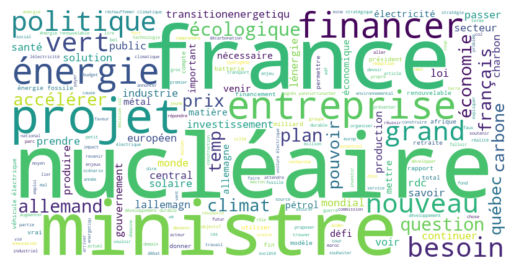

In [22]:
#2023

freq_dis_all = FreqDist(all_txt_lemma)
freqAll = pd.DataFrame(list(freq_dis_all.items()), columns=['mots', 'fréquence d\'apparition depuis début 2023'])

freqAll['fréquence d\'apparition depuis début 2023'] = pd.to_numeric(freqAll['fréquence d\'apparition depuis début 2023'], errors='coerce')
freq_newAll = freqAll.sort_values('fréquence d\'apparition depuis début 2023', ascending=False)

freq_newAll.to_csv('./exportfile/frequenceMots/20230507 Fréquence d\'occurrence de mots tendances - Transition Energetique_Debut_2023.csv', encoding='utf-8', index=False)

df_tweetsAll = pd.DataFrame(convertodf(all_txt_lemma), columns=['Content'])
text = ' '.join(df_tweetsAll['Content'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()




In [23]:
#JANVIER

freq_disJ = FreqDist(lemma_J)
freqJ = pd.DataFrame(list(freq_disJ.items()), columns=['mots', 'fréquence d\'apparition en Janvier'])

freqJ['fréquence d\'apparition en Janvier'] = pd.to_numeric(freqJ['fréquence d\'apparition en Janvier'], errors='coerce')
freq_newJ = freqJ.sort_values('fréquence d\'apparition en Janvier', ascending=False)

freq_newJ.to_csv('./exportfile/frequenceMots/20230507 Fréquence d\'occurrence de mots tendances - Transition Energetique_JANVIER.csv', encoding='utf-8', index=False)


In [24]:
#FEVRIER

freq_disF = FreqDist(lemma_F)
freqF = pd.DataFrame(list(freq_disF.items()), columns=['mots', 'fréquence d\'apparition en Février'])

freqF['fréquence d\'apparition en Février'] = pd.to_numeric(freqF['fréquence d\'apparition en Février'], errors='coerce')
freq_newF = freqF.sort_values('fréquence d\'apparition en Février', ascending=False)

freq_newF.to_csv('./exportfile/frequenceMots/20230507 Fréquence d\'occurrence de mots tendances - Transition Energetique_FEVRIER.csv', encoding='utf-8', index=False)


In [25]:
#MARS

freq_disM = FreqDist(lemma_M)
freqM = pd.DataFrame(list(freq_disM.items()), columns=['mots', 'fréquence d\'apparition en Mars'])

freqM['fréquence d\'apparition en Mars'] = pd.to_numeric(freqM['fréquence d\'apparition en Mars'], errors='coerce')
freq_newM = freqM.sort_values('fréquence d\'apparition en Mars', ascending=False)

freq_newM.to_csv('./exportfile/frequenceMots/20230507 Fréquence d\'occurrence de mots tendances - Transition Energetique_MARS.csv', encoding='utf-8', index=False)



In [26]:
#AVRIL


freq_disA = FreqDist(lemma_A)
freqA = pd.DataFrame(list(freq_disA.items()), columns=['mots', 'fréquence d\'apparition en Avril'])

freqA['fréquence d\'apparition en Avril'] = pd.to_numeric(freqA['fréquence d\'apparition en Avril'], errors='coerce')
freq_newA = freqA.sort_values('fréquence d\'apparition en Avril', ascending=False)

freq_newA.to_csv('./exportfile/frequenceMots/20230507 Fréquence d\'occurrence de mots tendances - Transition Energetique_AVRIL.csv', encoding='utf-8', index=False)


In [27]:
display(freq_newJ.head(20), freq_newF.head(20), freq_newM.head(20), freq_newA.head(20))


,mots,fréquence d'apparition en Janvier
250,ministre,58
136,énergie,56
72,nucléaire,30
530,france,29
347,entreprise,26
137,fossile,25
346,projet,24
2,financer,23
247,mettre,22
409,allemand,22


,mots,fréquence d'apparition en Février
124,nucléaire,33
519,énergie,30
82,france,27
180,électrique,27
199,ministre,23
137,projet,20
724,vert,19
72,prix,19
209,question,19
694,carbone,19


,mots,fréquence d'apparition en Mars
33,ministre,48
322,énergie,45
48,france,43
76,nucléaire,40
80,projet,33
115,solaire,31
8,climatique,28
897,grand,26
374,métal,26
204,financer,22


,mots,fréquence d'apparition en Avril
97,nucléaire,34
135,ministre,28
239,france,27
247,électrique,26
556,énergie,24
505,milliard,24
510,co2,21
509,émission,20
138,entreprise,17
507,réduire,17


<font color='#2a7ebc'><h3>Export de la table des tweets en fonctions de leurs sentiments - VADER</h3><h4>Objectifs : Savoir si la Transition énergétique a été un sujet de controverse au fil des semaines/par mois + Courbe des sentiments sur la transition énergétique</h4></font>

In [28]:
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

C:\Users\gmare\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [230]:

def get_freq():
    dfTendancesThemeJ = pd.read_csv('20230507 Dictionnaire de mots - Transition Energetique_JANVIER_.csv', sep=';', nrows=50)
    tab = []
    for v in dfTendancesThemeJ["mots"]:
        tab.append(v)  
    return tab
    
def normalise_row(row):
    wrap_manger_jai_faim = get_freq()    
    matches = list(filter(lambda x: x in row["Content"], wrap_manger_jai_faim))
    return matches

SIA = SentimentIntensityAnalyzer()

def polarity_score(compound):
    if compound > 0.05:
        return "Positif"
    elif compound < -0.05:
        return "Negatif"
    elif compound >= -0.05 and compound < 0.05:
        return "Neutre"
    
    

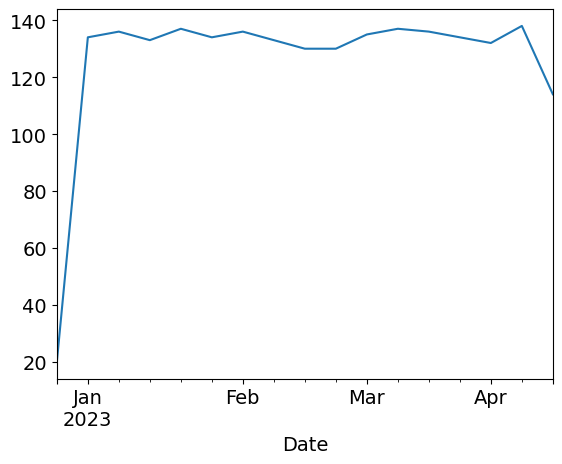

In [292]:
#2023

dfAll = pd.DataFrame(df,columns=['Content','Date','Jour', 'Mois', 'Année', 'Utilisateur', 'Thème', 'Score', 'Compound', 'Sentiment'])

dfAll['Mentions principales']= dfAll.apply(lambda row : normalise_row(row), axis=1) 
dfAll['Score']= dfAll.apply(lambda row : SIA.polarity_scores(row["Content"]), axis=1) 
dfAll['Compound'] = dfAll['Score'].apply(lambda txt: txt['compound'])
dfAll['Sentiment'] = dfAll['Compound'].apply(lambda val: polarity_score(val))


dfAll.to_csv('./exportfile/trendsbysentiments/20230507 Tweets par Sentiments - Transition Energetique_2023.csv', encoding='utf-8', index=False)

dfAlltxt = pd.DataFrame(dfAll,columns=['Content','Date',"Compound", 'Mentions principales','Sentiment'])
dfAlltxt = dfAlltxt.dropna(subset=['Mentions principales'])

tweets_par_semaine2023 = dfAll.resample('W', on='Date').count()['Content'].shift(-6, freq='D')

tweets_par_semaine2023.plot(kind='line')
plt.show()

df_tweets_par_semaine2023 = tweets_par_semaine2023.reset_index()
df_tweets_par_semaine2023 = df_tweets_par_semaine2023.rename(columns={'Date': 'Semaine', 'Content': 'Count'})

df_tweets_par_semaine2023.to_csv('./exportfile/frequenceMots/20230507 Fréquence d\'occurrence de mots tendances par semaine - Transition Energetique_2023.csv', encoding='utf-8', index=False)


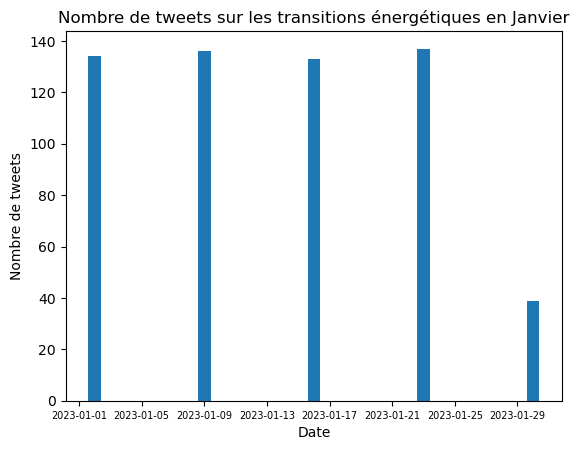

In [232]:
#JANVIER
dfJV = pd.DataFrame(dfJanvier,columns=['Content','Date','Jour', 'Mois', 'Année', 'Utilisateur', 'Thème', 'Score', 'Compound', 'Sentiment'])

dfJV['Mentions principales']= dfJV.apply(lambda row : normalise_row(row), axis=1) 
dfJV['Score']= dfJV.apply(lambda row : SIA.polarity_scores(row["Content"]), axis=1) 
dfJV['Compound'] = dfJV['Score'].apply(lambda txt: txt['compound'])
dfJV['Sentiment'] = dfJV['Compound'].apply(lambda val: polarity_score(val))

dfJV.to_csv('./exportfile/trendsbysentiments/20230507 Tweets par Sentiments - Transition Energetique_JANVIER.csv', encoding='utf-8', index=False)

dfJVA = pd.DataFrame(dfJV,columns=['Content','Date','Mentions principales','Sentiment'])
dfJVA = dfJVA.dropna(subset=['Mentions principales'])

tweets_par_semaineJ = dfJVA.resample('W', on='Date').count()['Content'].shift(-6, freq='D')


fig, ax = plt.subplots()
ax.bar(tweets_par_semaineJ.index, tweets_par_semaineJ.values)
ax.set_title('Nombre de tweets sur les transitions énergétiques en Janvier')
ax.set_xlabel('Date')
ax.set_ylabel('Nombre de tweets')
ax.tick_params(axis='x', labelsize=7)

plt.show()

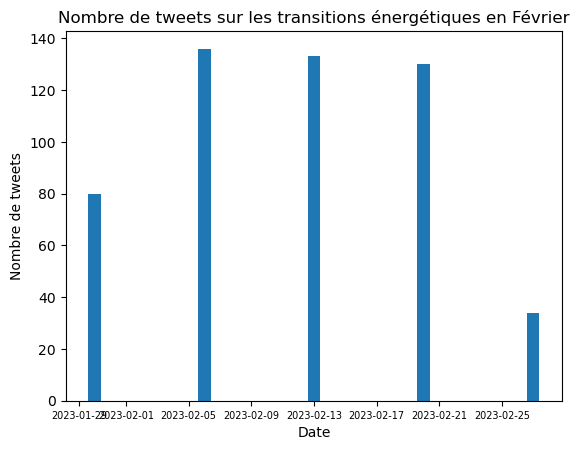

In [233]:
#FEVRIER

dfF = pd.DataFrame(dfFevrier,columns=['Content','Date','Jour', 'Mois', 'Année', 'Utilisateur', 'Thème', 'Score', 'Compound', 'Sentiment'])

dfF['Mentions principales']= dfF.apply(lambda row : normalise_row(row), axis=1) 
dfF['Score']= dfF.apply(lambda row : SIA.polarity_scores(row["Content"]), axis=1) 
dfF['Compound'] = dfF['Score'].apply(lambda txt: txt['compound'])
dfF['Sentiment'] = dfF['Compound'].apply(lambda val: polarity_score(val))

dfF.to_csv('./exportfile/trendsbysentiments/20230507 Tweets par Sentiments - Transition Energetique_FEVRIER.csv', encoding='utf-8', index=False)

dfFV = pd.DataFrame(dfF,columns=['Content','Date','Mentions principales','Sentiment'])
dfFV = dfFV.dropna(subset=['Mentions principales'])

tweets_par_semaineF = dfFV.resample('W', on='Date').count()['Content'].shift(-6, freq='D')

fig, ax = plt.subplots()
ax.bar(tweets_par_semaineF.index, tweets_par_semaineF.values)
ax.set_title('Nombre de tweets sur les transitions énergétiques en Février')
ax.set_xlabel('Date')
ax.set_ylabel('Nombre de tweets')
ax.tick_params(axis='x', labelsize=7)

plt.show()

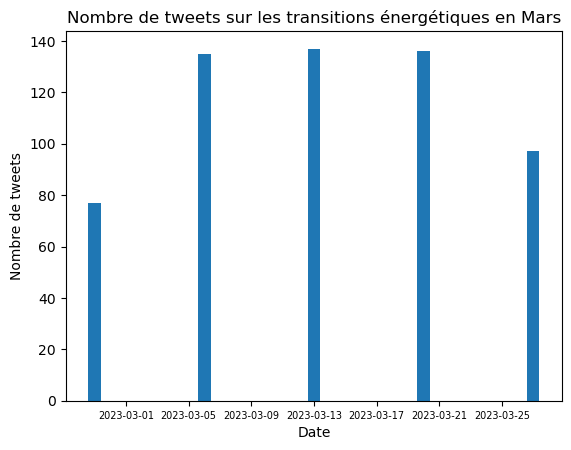

In [234]:
#MARS

dfM = pd.DataFrame(dfMars,columns=['Content','Date','Jour', 'Mois', 'Année', 'Utilisateur', 'Thème', 'Score', 'Compound', 'Sentiment'])

dfM['Mentions principales']= dfM.apply(lambda row : normalise_row(row), axis=1) 
dfM['Score']= dfM.apply(lambda row : SIA.polarity_scores(row["Content"]), axis=1) 
dfM['Compound'] = dfM['Score'].apply(lambda txt: txt['compound'])
dfM['Sentiment'] = dfM['Compound'].apply(lambda val: polarity_score(val))

dfM.to_csv('./exportfile/trendsbysentiments/20230507 Tweets par Sentiments - Transition Energetique_MARS.csv', encoding='utf-8', index=False)

dfMR = pd.DataFrame(dfM,columns=['Content','Date','Mentions principales','Sentiment'])
dfMR = dfMR.dropna(subset=['Mentions principales'])

tweets_par_semaineM = dfMR.resample('W', on='Date').count()['Content'].shift(-6, freq='D')

fig, ax = plt.subplots()
ax.bar(tweets_par_semaineM.index, tweets_par_semaineM.values)
ax.set_title('Nombre de tweets sur les transitions énergétiques en Mars')
ax.set_xlabel('Date')
ax.set_ylabel('Nombre de tweets')
ax.tick_params(axis='x', labelsize=7)

plt.show()

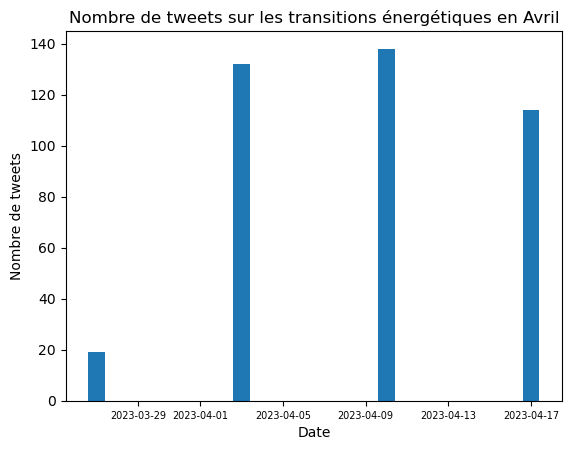

In [235]:
#AVRIL

dfA = pd.DataFrame(dfAvril,columns=['Content','Date','Jour', 'Mois', 'Année', 'Utilisateur', 'Thème', 'Score', 'Compound', 'Sentiment'])

dfA['Mentions principales']= dfA.apply(lambda row : normalise_row(row), axis=1) 
dfA['Score']= dfA.apply(lambda row : SIA.polarity_scores(row["Content"]), axis=1) 
dfA['Compound'] = dfA['Score'].apply(lambda txt: txt['compound'])
dfA['Sentiment'] = dfA['Compound'].apply(lambda val: polarity_score(val))

dfA.to_csv('./exportfile/trendsbysentiments/20230507 Tweets par Sentiments - Transition Energetique_AVRIL.csv', encoding='utf-8', index=False)

dfAV = pd.DataFrame(dfA,columns=['Content','Date','Mentions principales','Sentiment'])
dfAV = dfAV.dropna(subset=['Mentions principales'])

tweets_par_semaineA = dfAV.resample('W', on='Date').count()['Content'].shift(-6, freq='D')

fig, ax = plt.subplots()
ax.bar(tweets_par_semaineA.index, tweets_par_semaineA.values)
ax.set_title('Nombre de tweets sur les transitions énergétiques en Avril')
ax.set_xlabel('Date')
ax.set_ylabel('Nombre de tweets')
ax.tick_params(axis='x', labelsize=7)

plt.show()

<font color='#2a7ebc'><h3>Export de la table d'évolution des tweets</h3><h4>Objectifs : Voir l'évolution du volume de tweets sur les transitions énergétiques : l'augmentation ou la diminution des tweets concernant la T.E. au fil du temps</h4></font>

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
!pip install pandas --upgrade

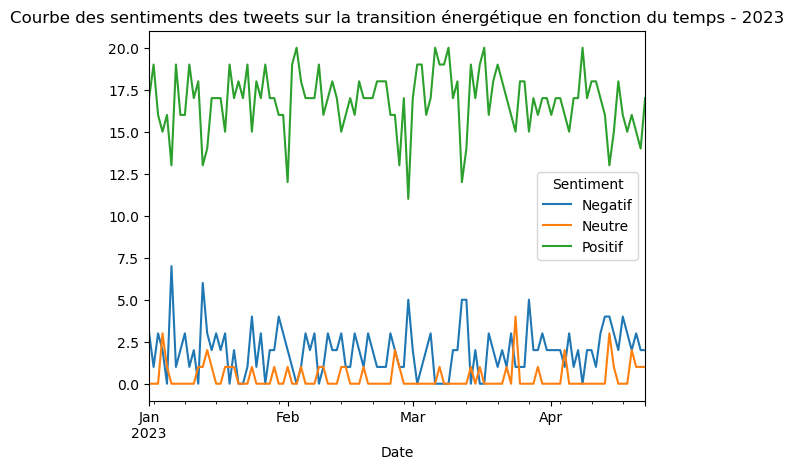

Sentiment,Negatif,Neutre,Positif
Date,,,
2023-01-01,3.0,0.0,17.0
2023-01-02,1.0,0.0,19.0
2023-01-03,3.0,0.0,16.0
2023-01-04,2.0,3.0,15.0
2023-01-05,0.0,1.0,16.0
...,...,...,...
2023-04-18,3.0,0.0,15.0
2023-04-19,2.0,2.0,16.0
2023-04-20,3.0,1.0,15.0


In [236]:
#2023


dfAll['Date'] = pd.to_datetime(dfAll['Date'])
df_sentiments = dfAll.resample('D', on='Date')['Sentiment'].value_counts().unstack().fillna(0)
df_sent_par_semaine2023 = df_sentiments.reset_index()
df_sent_par_semaine2023.to_csv('./exportfile/trendsbysentiments/20230507 Sentiment Count par Jour - Transition Energetique_2023.csv', encoding='utf-8', index=False)

df_sentiments.plot(kind='line')
plt.title("Courbe des sentiments des tweets sur la transition énergétique en fonction du temps - 2023")
plt.show()

df_sent_par_semaine2023

df_sentiments

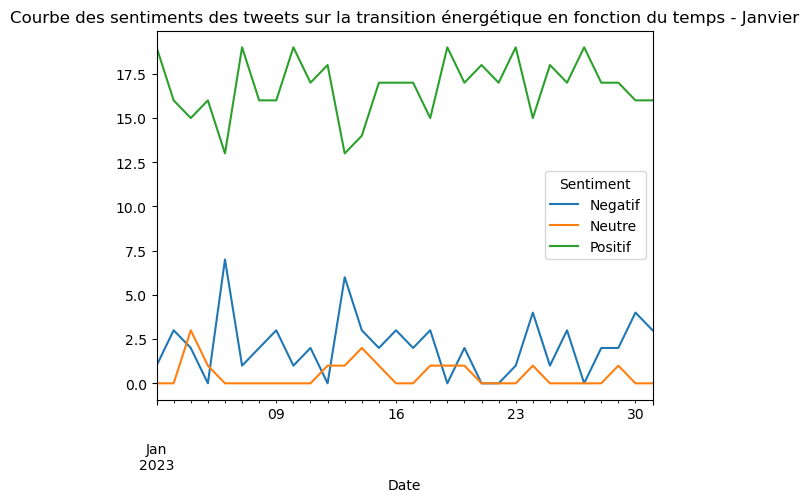

In [237]:
#JANVIER

dfJVA['Date'] = pd.to_datetime(dfJVA['Date'])

df_sentiments = dfJVA.resample('D', on='Date')['Sentiment'].value_counts().unstack().fillna(0)

df_sentiments.plot(kind='line')
plt.title("Courbe des sentiments des tweets sur la transition énergétique en fonction du temps - Janvier")
plt.show()

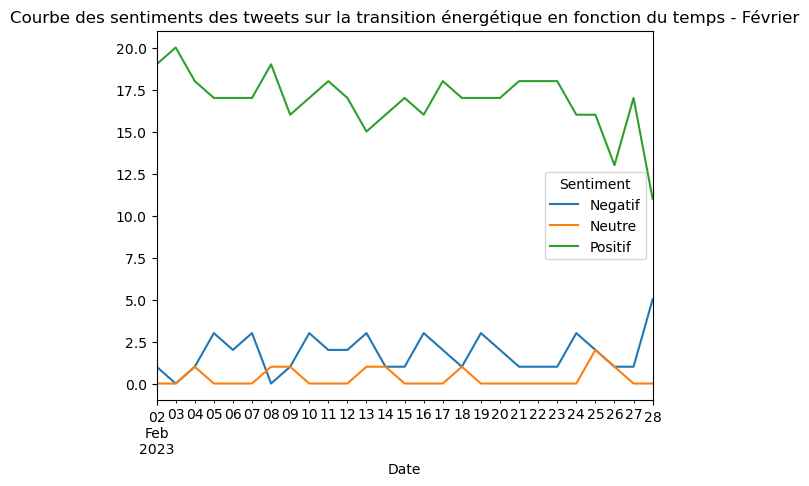

In [238]:
#FEVRIER

dfF['Date'] = pd.to_datetime(dfF['Date'])

df_sentiments = dfF.resample('D', on='Date')['Sentiment'].value_counts().unstack().fillna(0)

df_sentiments.plot(kind='line')
plt.title("Courbe des sentiments des tweets sur la transition énergétique en fonction du temps - Février")
plt.show()

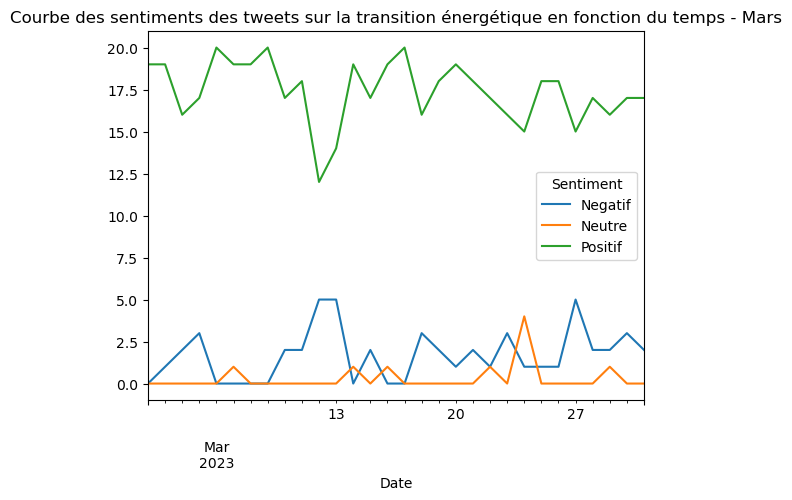

In [239]:
#MARS

dfM['Date'] = pd.to_datetime(dfM['Date'])

df_sentiments = dfM.resample('D', on='Date')['Sentiment'].value_counts().unstack().fillna(0)

df_sentiments.plot(kind='line')
plt.title("Courbe des sentiments des tweets sur la transition énergétique en fonction du temps - Mars")
plt.show()

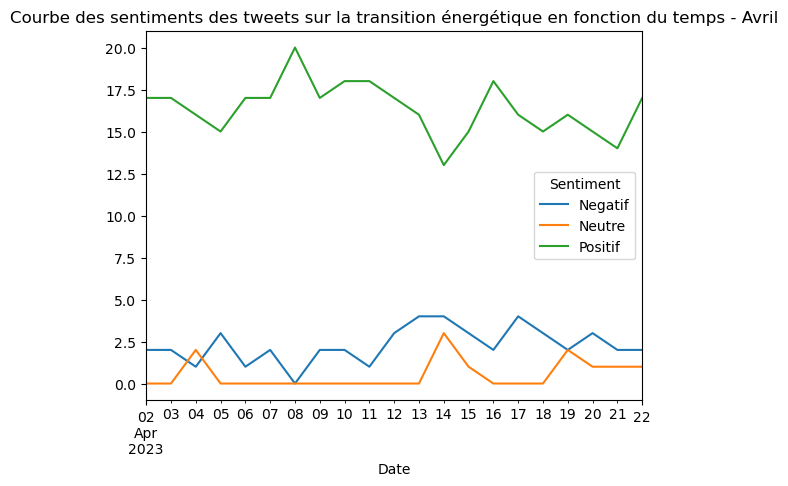

,Content,Date,Jour,Mois,Année,Utilisateur,Thème,Score,Compound,Sentiment,Mentions principales
1746,Alors que le monde entier parle de la transiti...,2023-04-02,2,4,2023,Jean Baptiste Bokoto,NaN,"{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'comp...",0.8173,Positif,"[climat, monde]"
1747,C'est surtout que si l'on peut faire autrement...,2023-04-02,2,4,2023,Sauvegarde Paysages d'Iroise,NaN,"{'neg': 0.064, 'neu': 0.767, 'pos': 0.169, 'co...",0.4682,Positif,[]
1748,Gros défis! La politique environnementale de l...,2023-04-02,2,4,2023,Chloé Sondervorst,NaN,"{'neg': 0.064, 'neu': 0.822, 'pos': 0.113, 'co...",0.2942,Positif,[politique]
1749,Comment faire pour que des populations de #RDC...,2023-04-02,2,4,2023,Reevolution Productions,NaN,"{'neg': 0.059, 'neu': 0.768, 'pos': 0.173, 'co...",0.6669,Positif,"[france, prix]"
1750,L'eolienne est un électricité très cher et for...,2023-04-02,2,4,2023,Celestino,NaN,"{'neg': 0.037, 'neu': 0.75, 'pos': 0.213, 'com...",0.8377,Positif,[électricité]
...,...,...,...,...,...,...,...,...,...,...,...
2144,"Ils sont incompétents, ils n'ont rien réformé ...",2023-04-22,22,4,2023,Fred,NaN,"{'neg': 0.167, 'neu': 0.725, 'pos': 0.108, 'co...",-0.3786,Negatif,[politique]
2145,_xDCA1__xD83D_ Pour profiter au mieux de la tr...,2023-04-22,22,4,2023,Guy Hoquet Ermont,NaN,"{'neg': 0.06, 'neu': 0.679, 'pos': 0.261, 'com...",0.7965,Positif,[consommation]
2146,"_xDF0D__xD83C_ En conclusion, la logistique ur...",2023-04-22,22,4,2023,Ahmed Guenaoui,NaN,"{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'comp...",0.8720,Positif,"[électrique, durable]"
2147,"Pour aller + loin, rejoignez notre webinaire a...",2023-04-22,22,4,2023,Ahmed Guenaoui,NaN,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",0.5994,Positif,[]


In [240]:
#AVRIL

dfA['Date'] = pd.to_datetime(dfA['Date'])

df_sentiments = dfA.resample('D', on='Date')['Sentiment'].value_counts().unstack().fillna(0)

df_sentiments.plot(kind='line')
plt.title("Courbe des sentiments des tweets sur la transition énergétique en fonction du temps - Avril")
plt.show()

dfA

<font color='#2a7ebc'><h3>Export de la table des thèmes des tweets</h3><h4>Objectifs : Connaître les thèmes évoqués tendances du mois et voir quels thèmes sont les plus controversés en fonction du temps (Tweets, Thème, Date, Sentiment)</h4></font>

In [241]:
#On va tenter le STEM pour que Gensim comprenne mieux les mots SISRA

def getstring():
    tab =[]
    for i in all_txt_lemma:
        tab.append(i)
    
    return tab

len(tab)

26024

In [69]:
!pip install --upgrade gensim
import gensim
from gensim import corpora




In [103]:
documents = list(map(lambda doc: doc.split(), getstring()))
dictionary = corpora.Dictionary(documents)

corpus = [dictionary.doc2bow(doc) for doc in documents]

lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=30)

for topic in lda_model.print_topics():
    print(topic)
    

(0, '0.029*"plan" + 0.024*"investissement" + 0.019*"solution" + 0.018*"pétrol" + 0.017*"devenir" + 0.016*"falloir" + 0.015*"permettre" + 0.014*"donner" + 0.013*"industriel" + 0.012*"partir"')
(1, '0.034*"renouvelable" + 0.033*"vert" + 0.032*"nouveau" + 0.022*"important" + 0.021*"loi" + 0.014*"économique" + 0.014*"croissance" + 0.014*"terme" + 0.011*"cours" + 0.010*"cas"')
(2, '0.050*"électrique" + 0.028*"co2" + 0.024*"fossile" + 0.022*"charbon" + 0.022*"secteur" + 0.020*"voir" + 0.018*"industrie" + 0.016*"santé" + 0.015*"président" + 0.015*"produire"')
(3, '0.115*"transitionenergetiqu" + 0.067*"ministre" + 0.033*"grand" + 0.028*"financer" + 0.020*"engager" + 0.013*"transport" + 0.012*"retraite" + 0.012*"emploi" + 0.011*"faire" + 0.011*"réchauffemer"')
(4, '0.102*"enjeux" + 0.064*"nucléaire" + 0.039*"milliard" + 0.029*"entreprise" + 0.026*"allemand" + 0.025*"besoin" + 0.021*"allemagne" + 0.020*"réduire" + 0.016*"pannierrunacher" + 0.014*"dénergie"')
(5, '0.041*"solaire" + 0.029*"politiq

In [243]:
for index, row in dfAlltxt.iterrows():
    # Récupérer le texte du tweet et le convertir en sac de mots
    texte_tweet = row['Content']
    sac_de_mots_tweet = dictionary.doc2bow(texte_tweet.split())
    
    # Classifier le tweet dans l'un des thèmes
    theme_tweet = lda_model[sac_de_mots_tweet]
    theme_tweet = max(theme_tweet, key=lambda item: item[1])[0] # Récupérer l'indice du thème ayant la plus grande probabilité
    
    # Affecter le nom du thème au tweet
    nom_theme_tweet = "Thème " + str(theme_tweet)
    dfAlltxt.at[index, 'Thème'] = nom_theme_tweet
    
dfAlltxt

,Content,Date,Compound,Mentions principales,Sentiment,Thème
0,Vœux 2023: le Président de l’exécutif de la CT...,2023-01-01,0.8011,[],Positif,Thème 1
1,Ceux qui ont décidé des objectifs en terme de ...,2023-01-01,-0.2500,"[électrique, objectif]",Negatif,Thème 2
2,"Notre transition énergétique, nous l'avons fai...",2023-01-01,0.5987,[plan],Positif,Thème 0
3,"""La France a réduit la part de l'électricité p...",2023-01-01,0.9229,"[nucléaire, électricité, objectif]",Positif,Thème 4
4,Tres bonne année et #IESF à bientôt sur l'ant...,2023-01-01,0.6900,[],Positif,Thème 1
...,...,...,...,...,...,...
2144,"Ils sont incompétents, ils n'ont rien réformé ...",2023-04-22,-0.3786,[politique],Negatif,Thème 1
2145,_xDCA1__xD83D_ Pour profiter au mieux de la tr...,2023-04-22,0.7965,[consommation],Positif,Thème 2
2146,"_xDF0D__xD83C_ En conclusion, la logistique ur...",2023-04-22,0.8720,"[électrique, durable]",Positif,Thème 0
2147,"Pour aller + loin, rejoignez notre webinaire a...",2023-04-22,0.5994,[],Positif,Thème 5


In [244]:
def remplacer_nomTheme(datafr):
    for i in range(10):
        remplacementTh_i = datafr['Thème'] == 'Thème '+str(i)
        if (i==0):
            datafr.loc[remplacementTh_i, 'Thème'] = "Plan d'investissement industriel"
        if (i==1):
            datafr.loc[remplacementTh_i, 'Thème'] = "Énergies renouvelables et croissance économique"
        if (i==2):
            datafr.loc[remplacementTh_i, 'Thème'] = "Émissions de CO2 et transition énergétique"
        if (i==3):
            datafr.loc[remplacementTh_i, 'Thème'] = "Transition énergétique et politique gouvernementale"
        if (i==4):
            datafr.loc[remplacementTh_i, 'Thème'] = "Enjeux du nucléaire et besoin de réduction d'énergie"
        if (i==5):
            datafr.loc[remplacementTh_i, 'Thème'] = "Énergie solaire et éolienne, politiques et réglementations"
        if (i==6):
            datafr.loc[remplacementTh_i, 'Thème'] = "Enjeux énergétiques mondiaux et financement de la transition"
        if (i==7):
            datafr.loc[remplacementTh_i, 'Thème'] = "Projet d'énergie durable et politiques gouvernementales"
        if (i==8):
            datafr.loc[remplacementTh_i, 'Thème'] = "Développement de la production d'énergie et réglementations européennes"
        if (i==9):
            datafr.loc[remplacementTh_i, 'Thème'] = "Économie française et recherche en énergie."
                                           
    return datafr

remplacer_nomTheme(dfAlltxt)


dfThemeGensim = pd.DataFrame(dfAlltxt, columns=["Content", "Date", "Compound", "Sentiment", "Thème"])

dfThemeGensim.to_csv('./exportfile/themesTrends/20230508 Liste des thèmes par tweets avec les polarités - Transition Energetique_2023.csv', encoding='utf-8-sig', index=False)

dfThemeGensim

,Content,Date,Compound,Sentiment,Thème
0,Vœux 2023: le Président de l’exécutif de la CT...,2023-01-01,0.8011,Positif,Énergies renouvelables et croissance économique
1,Ceux qui ont décidé des objectifs en terme de ...,2023-01-01,-0.2500,Negatif,Émissions de CO2 et transition énergétique
2,"Notre transition énergétique, nous l'avons fai...",2023-01-01,0.5987,Positif,Plan d'investissement industriel
3,"""La France a réduit la part de l'électricité p...",2023-01-01,0.9229,Positif,Enjeux du nucléaire et besoin de réduction d'é...
4,Tres bonne année et #IESF à bientôt sur l'ant...,2023-01-01,0.6900,Positif,Énergies renouvelables et croissance économique
...,...,...,...,...,...
2144,"Ils sont incompétents, ils n'ont rien réformé ...",2023-04-22,-0.3786,Negatif,Énergies renouvelables et croissance économique
2145,_xDCA1__xD83D_ Pour profiter au mieux de la tr...,2023-04-22,0.7965,Positif,Émissions de CO2 et transition énergétique
2146,"_xDF0D__xD83C_ En conclusion, la logistique ur...",2023-04-22,0.8720,Positif,Plan d'investissement industriel
2147,"Pour aller + loin, rejoignez notre webinaire a...",2023-04-22,0.5994,Positif,"Énergie solaire et éolienne, politiques et rég..."


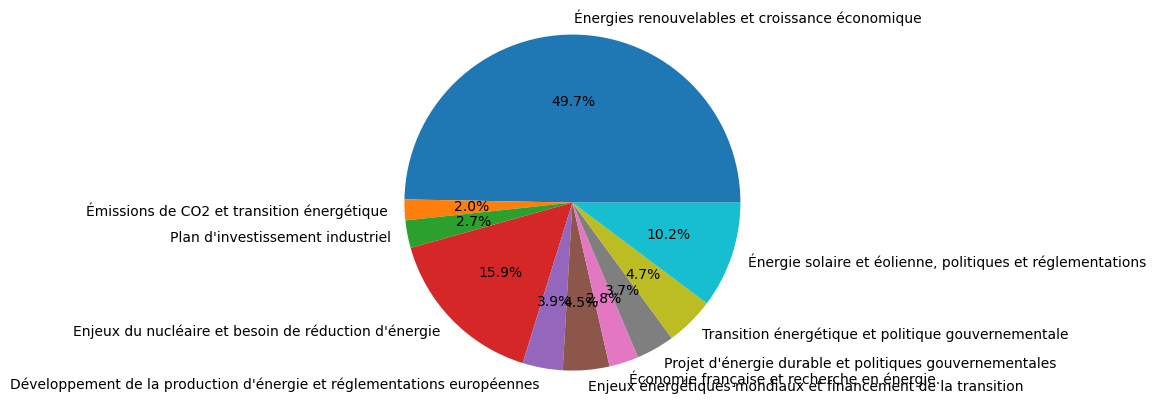

In [245]:
values = dfAlltxt.groupby('Thème').count()['Content']
df_values = dfAlltxt.groupby('Thème').count()['Content'].reset_index(name='Pourcentage')

plt.pie(values, labels=dfAlltxt['Thème'].unique(), autopct='%1.1f%%')
plt.axis('equal')
plt.show()
valuesdf = pd.DataFrame(values, columns = ["Thème", "Pourcentage"])

df_values.to_csv('./exportfile/themesTrends/20230508 Liste des thèmes en fonction de pourcentage d\'apparitions sur Twitter - Transition Energetique_2023.csv', encoding='utf-8-sig', index=False)


In [246]:
filtrage_dev = dfThemeGensim.loc[dfThemeGensim['Thème'].isin(['Énergie solaire et éolienne, politiques et réglementations', 'Énergies renouvelables et croissance économique', 'Enjeux du nucléaire et besoin de réduction d\'énergie'])]

grouper_tweets_sentiment_date = dfThemeGensim.groupby(['Date', 'Sentiment']).size().reset_index(name='Nombre de tweets')
df_test = pd.DataFrame(filtrage_dev, columns = ["Date", "Compound", "Thème"])
df_testby =  df_test.groupby(["Date", "Thème"]).mean().reset_index()
df_testby.to_csv('./exportfile/themesTrends/20230508 Evolution de la polarité des sentiments en fonction des thèmes au cours du temps - Transition Energetique_2023.csv', encoding='utf-8-sig', index=False)

df_testby



,Date,Thème,Compound
0,2023-01-01,Enjeux du nucléaire et besoin de réduction d'é...,0.922900
1,2023-01-01,Énergies renouvelables et croissance économique,0.745550
2,2023-01-02,"Énergie solaire et éolienne, politiques et rég...",0.492600
3,2023-01-02,Énergies renouvelables et croissance économique,0.344500
4,2023-01-03,Énergies renouvelables et croissance économique,0.378633
...,...,...,...
188,2023-04-20,"Énergie solaire et éolienne, politiques et rég...",-0.892400
189,2023-04-20,Énergies renouvelables et croissance économique,0.254000
190,2023-04-22,Enjeux du nucléaire et besoin de réduction d'é...,0.380600
191,2023-04-22,"Énergie solaire et éolienne, politiques et rég...",0.599400


In [247]:
dfJanuaryyy = df_testby[(df_testby['Date'] > '2023-01-01') & (df_testby['Date'] < '2023-02-01')]
dfFebruaaryy = df_testby[(df_testby['Date'] > '2023-02-01') & (df_testby['Date'] < '2023-03-01')]
dfMaarrchh = df_testby[(df_testby['Date'] > '2023-03-01') & (df_testby['Date'] < '2023-04-01')]
dfApriil = df_testby[(df_testby['Date'] > '2023-04-01') & (df_testby['Date'] < '2023-05-01')]

dfJanuaryyy




,Date,Thème,Compound
2,2023-01-02,"Énergie solaire et éolienne, politiques et rég...",0.492600
3,2023-01-02,Énergies renouvelables et croissance économique,0.344500
4,2023-01-03,Énergies renouvelables et croissance économique,0.378633
5,2023-01-04,Enjeux du nucléaire et besoin de réduction d'é...,0.050767
6,2023-01-05,Enjeux du nucléaire et besoin de réduction d'é...,0.025800
7,2023-01-05,"Énergie solaire et éolienne, politiques et rég...",0.652800
8,2023-01-06,Enjeux du nucléaire et besoin de réduction d'é...,0.057350
9,2023-01-06,"Énergie solaire et éolienne, politiques et rég...",0.535050
10,2023-01-06,Énergies renouvelables et croissance économique,0.900100
11,2023-01-07,Énergies renouvelables et croissance économique,0.273933


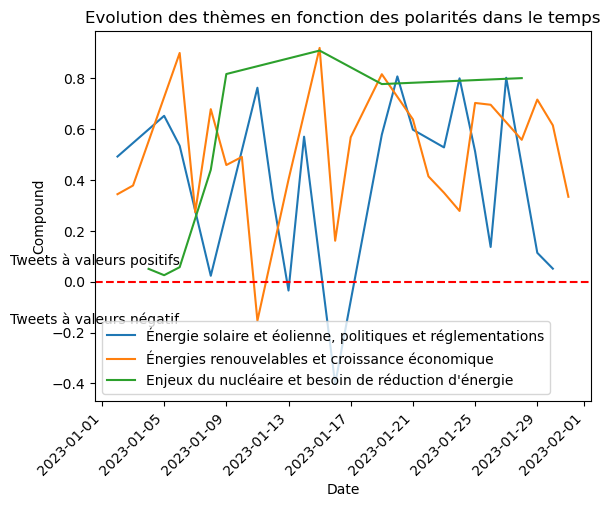

In [277]:
import matplotlib.pyplot as plt

df_plotJ = dfJanuaryyy.groupby(["Date", "Thème"]).mean().reset_index()

fig, ax = plt.subplots()


for theme in df_plotJ['Thème'].unique():
    df_theme = df_plotJ[df_plotJ['Thème'] == theme]
    ax.plot(df_theme['Date'], df_theme['Compound'], label=theme)

ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Compound')
plt.xticks(rotation=45, ha='right', fontsize=10)
ax.set_title('Evolution des thèmes en fonction des polarités dans le temps')

ax.axhline(y=0.0, color='red', linestyle='dashed')
ax.text(0.0, 0.2, 'Tweets à valeurs négatif', ha='center', va='bottom',  transform=ax.transAxes)
ax.text(0.0, 0.4, 'Tweets à valeurs positifs', ha='center', va='top',  transform=ax.transAxes)

plt.show()


df_plotJ.to_csv('./exportfile/themesTrends/20230508 Evolution de la moyenne de la polarité des sentiments en fonction des thèmes - Transition Energetique_JANVIER.csv', encoding='utf-8-sig', index=False)


C:\Users\gmare\AppData\Local\Temp\ipykernel_16336\3954470625.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_plot[(df_testby['Date'] > '2023-01-01') & (df_testby['Date'] < '2023-01-18')]


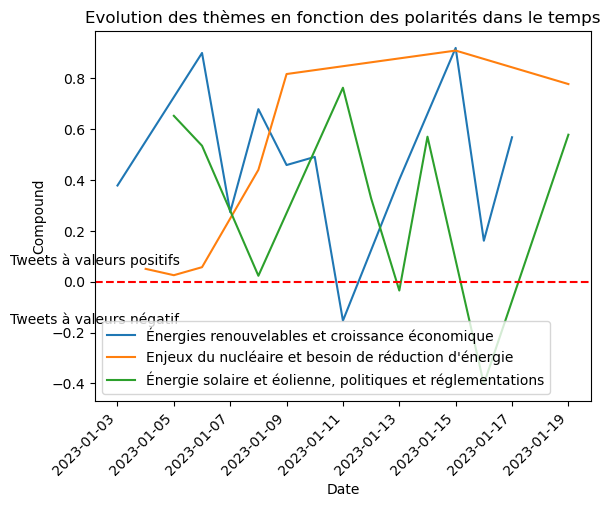

In [249]:
import matplotlib.pyplot as plt

df_plot = dfJanuaryyy.groupby(["Date", "Thème"]).mean().reset_index()
df_plot = df_plot[(df_testby['Date'] > '2023-01-01') & (df_testby['Date'] < '2023-01-18')]
fig, ax = plt.subplots()


for theme in df_plot['Thème'].unique():
    df_theme = df_plot[df_plot['Thème'] == theme]
    ax.plot(df_theme['Date'], df_theme['Compound'], label=theme)

ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Compound')
plt.xticks(rotation=45, ha='right', fontsize=10)
ax.set_title('Evolution des thèmes en fonction des polarités dans le temps')

ax.axhline(y=0.0, color='red', linestyle='dashed')
ax.text(0.0, 0.2, 'Tweets à valeurs négatif', ha='center', va='bottom',  transform=ax.transAxes)
ax.text(0.0, 0.4, 'Tweets à valeurs positifs', ha='center', va='top',  transform=ax.transAxes)

plt.show()

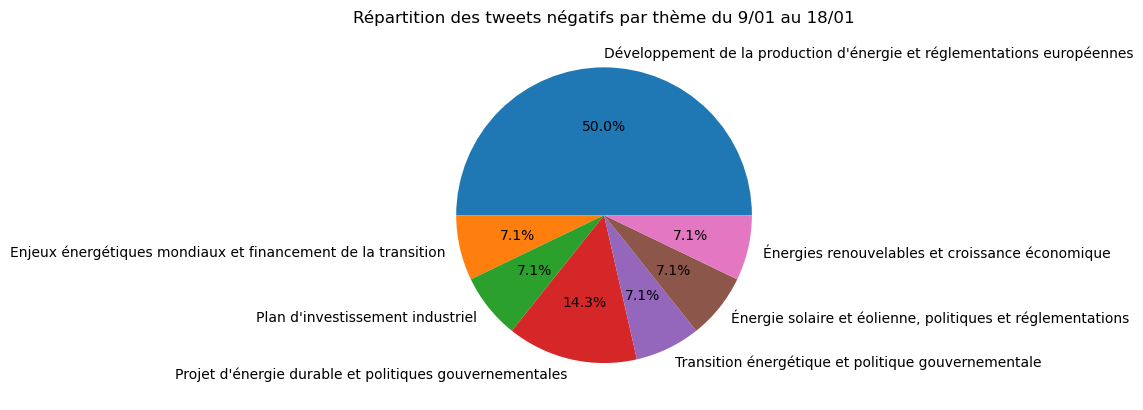

In [261]:
#REPARTITION DE LA NEGATIVITE ENTRE LE 09/01 AU 18/01
dfThemeGensim

df_plot_pres_date = dfThemeGensim[(dfThemeGensim['Date'] > '2023-01-08') &(dfThemeGensim['Date'] < '2023-01-19')]
df_plot_pres_tweet = df_plot_pres_date[(df_plot_pres_date['Compound'] < 0.0)]

df_plot_pres_neg = df_plot_pres_tweet.groupby(["Thème"]).count()['Content'].reset_index(name='Count')

df_plot_pres_neg.columns = ["Thème", "Count"]

labels = df_plot_pres_neg['Thème']
sizes = df_plot_pres_neg['Count']

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Répartition des tweets négatifs par thème du 9/01 au 18/01')

plt.show()


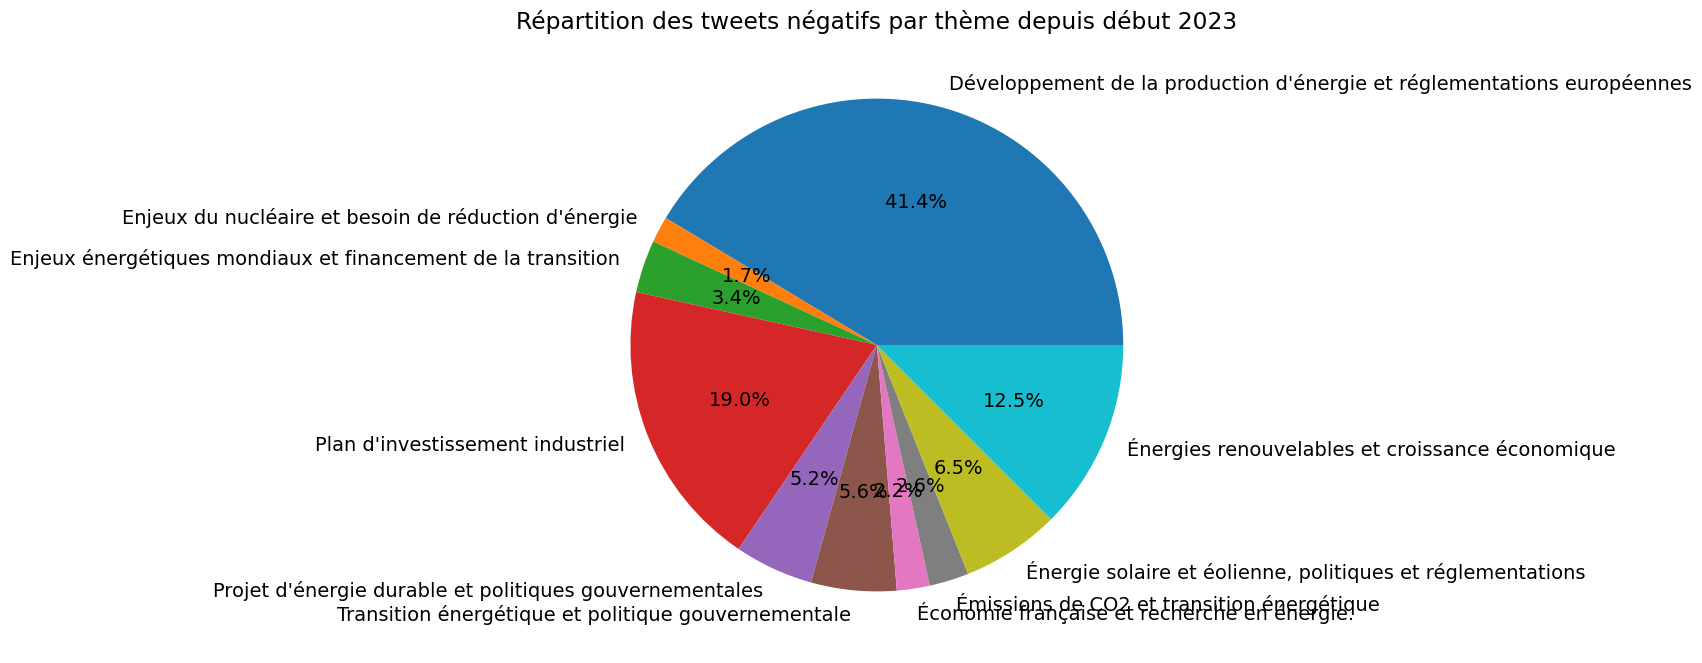

In [291]:
#REPARTITION DE LA NEGATIVITE DEPUIS LE DEBUT
dfThemeGensim

df_plot_pres_tweet = dfThemeGensim[(dfThemeGensim['Compound'] < 0.0)]

df_plot_pres_neg = df_plot_pres_tweet.groupby(["Thème"]).count()['Content'].reset_index(name='Count')

df_plot_pres_neg.columns = ["Thème", "Count"]

fig, ax = plt.subplots(figsize=(8, 8))

labels = df_plot_pres_neg['Thème']
sizes = df_plot_pres_neg['Count']

ax.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('Répartition des tweets négatifs par thème depuis début 2023')

plt.show()


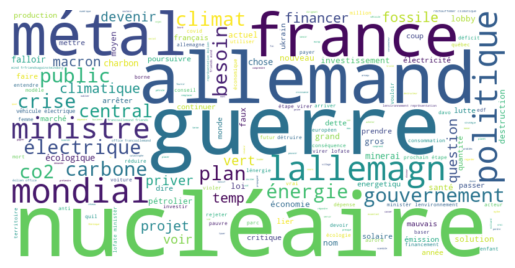

In [270]:
# PAR EXEMPLE SI ON REGARDE DE FACON PLUS PRECISE DE LA NEGATIVITE POUR LE THEME LE PLUS CONTROVERSE

dfAlltxt_Jan = dfThemeGensim[(dfThemeGensim['Date'] > '2023-01-08') &(dfThemeGensim['Date'] < '2023-01-19')]
dfAlltxt_Jan = dfThemeGensim[(dfThemeGensim['Compound'] < 0.05)]


def recleaning(dfResized):        
    dfAll_Resized = cleaningDfMonth(dfResized)
    allstring_res = get_all_words(dfAll_Resized)
    tokenAll_res = get_refactored_words(allstring_res)
    text_all_res = " ".join([i for i in tokenAll_res])
    mots_tokens_all_res = nltk.tokenize.word_tokenize(text_all_res)
    txt_all_res = convertTextStopWords(mots_tokens_all_res)
    all_txt_lemma_res = spacy_lemma(txt_all_res)
    return all_txt_lemma_res

clap = recleaning(dfAlltxt_Jan)
        
text = ' '.join(clap)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<font color='#2a7ebc'><h3>Export de la table des tweets controversés sur la T.E.</h3><h4>Objectifs : Connaître les sujets (rapports tweets cités/tweets retweets) + voir leurs évolutions en fonction du temps</h4></font>

<font color='#2a7ebc'><h3>Export de la table des tweets les plus appréciés du mois</h3><h4>Objectifs : Connaître les 5 tweets les plus aimés et likés </h4></font>

<h2><font color='green'>Import des tweets scrappés - Remplissage sous DataFrame</font></h2>